In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [2]:
dataframe = pd.read_csv('./../data/ecommerce_customer_data_custom_ratios.csv')

In [3]:
dataframe

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33308,2023-08-10 13:39:06,Clothing,279,2,2187,PayPal,55,1.0,Michelle Flores,55,Male,1
249996,48835,2021-11-23 01:30:42,Home,27,1,3615,Credit Card,42,1.0,Jeremy Rush,42,Female,1
249997,21019,2020-07-02 14:04:48,Home,17,5,2466,Cash,41,0.0,Tina Craig,41,Male,0
249998,49234,2020-12-30 02:02:40,Books,398,2,3668,Crypto,34,0.0,Jennifer Cooper,34,Female,1


In [4]:
dataframe.dtypes

Customer ID                int64
Purchase Date             object
Product Category          object
Product Price              int64
Quantity                   int64
Total Purchase Amount      int64
Payment Method            object
Customer Age               int64
Returns                  float64
Customer Name             object
Age                        int64
Gender                    object
Churn                      int64
dtype: object

In [5]:
dataframe.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [6]:
dataframe = dataframe[dataframe["Returns"] != 1.000]

In [7]:
dataframe['Gender'].value_counts()

Gender
Female    74949
Male      74282
Name: count, dtype: int64

In [8]:
dataframe['Payment Method'].unique() 

array(['Credit Card', 'PayPal', 'Cash', 'Crypto'], dtype=object)

In [9]:
df_grouped = dataframe.groupby('Customer ID')['Total Purchase Amount'].sum().reset_index()
df_grouped

,Customer ID,Total Purchase Amount
0,2,3778
1,3,13473
2,4,5561
3,5,5277
4,6,15517
...,...,...
47527,49996,11615
47528,49997,13112
47529,49998,7601
47530,49999,1773


In [10]:
product_counts = dataframe['Product Category'].value_counts()
product_counts

Product Category
Clothing       44930
Books          44683
Electronics    29914
Home           29704
Name: count, dtype: int64

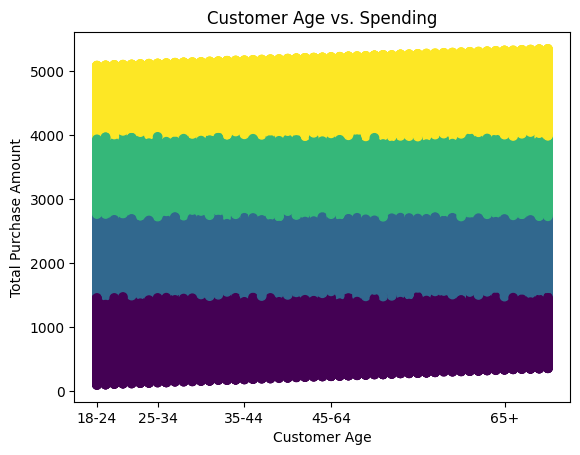

In [11]:
age_bins = [18, 25, 35, 45, 65]
age_labels = ['18-24', '25-34', '35-44', '45-64', '65+']

plt.scatter(dataframe['Customer Age'], dataframe['Total Purchase Amount'], c=pd.qcut(dataframe['Total Purchase Amount'], 4, labels=False))
plt.xlabel('Customer Age')
plt.ylabel('Total Purchase Amount')
plt.xticks(age_bins, age_labels)
plt.title('Customer Age vs. Spending')
plt.show()

In [12]:
churn_comparison = dataframe.groupby('Churn').mean()
churn_grouped = dataframe.groupby('Churn')['Purchase Date'].count().reset_index()
plt.bar(churn_grouped['Churn'], churn_grouped['Purchase Date'])
plt.xlabel('Churn Status')
plt.ylabel('Number of Purchases')
plt.title('Purchase Frequency by Churn')
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

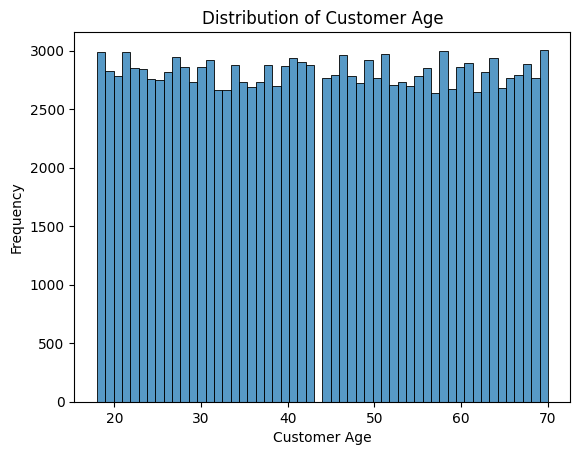

In [13]:
sns.histplot(data=dataframe, x='Customer Age')  # Plot histogram for 'Customer Age'
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Age')
plt.show()

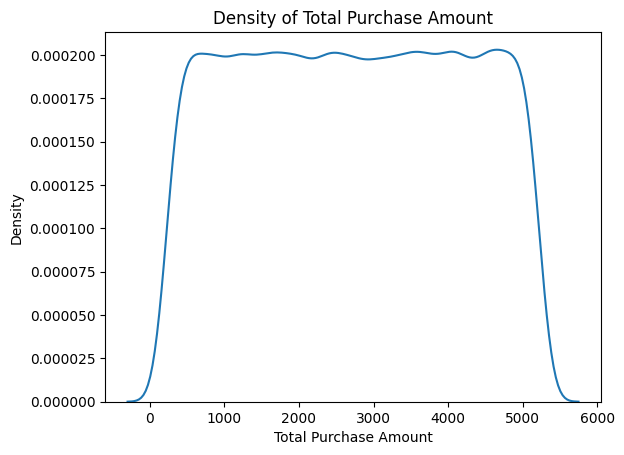

In [15]:
sns.kdeplot(data=dataframe, x='Total Purchase Amount')  # Plot KDE for 'Total Purchase Amount'
plt.xlabel('Total Purchase Amount')
plt.ylabel('Density')
plt.title('Density of Total Purchase Amount')
plt.show()

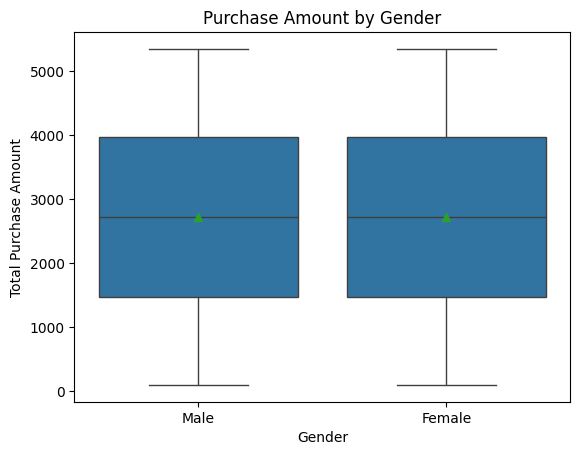

In [17]:
sns.boxplot(
    x='Gender',
    y='Total Purchase Amount',
    showmeans=True,  # Show mean values as markers
    data=dataframe
)
plt.xlabel('Gender')
plt.ylabel('Total Purchase Amount')
plt.title('Purchase Amount by Gender')
plt.show()

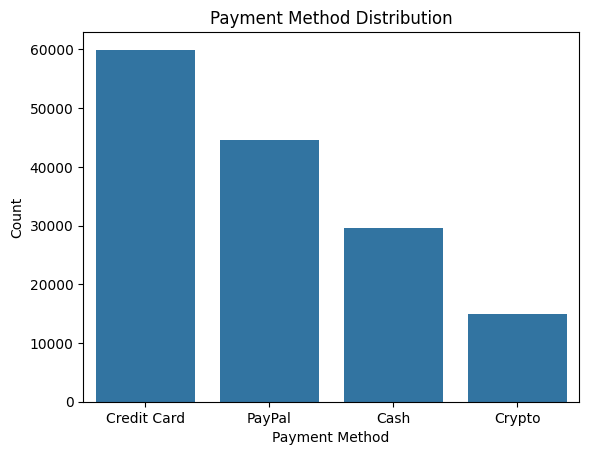

In [21]:
sns.countplot(x='Payment Method', data=dataframe)  # Count occurrences in 'Payment Method'
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Payment Method Distribution')
plt.show()